# Part 3: Predictive Modeling
EDA를 통해 데이터에 대한 인사이트를 얻음. 하지만 아직 예측을 할수는 없음. 이제 분류 알고리즘으로 예측할 차례 (Using 7 models).

1. 각각 7개의 모델을 훈련 예측.
    - KNN은 neighbor 개수에 따라 더 상세하게. 결과를 그래프로.
  
  
2. Cross Validation
    - 정확도만 높아서는 안됨. 특정 dataset이 overfit될 가능성 있음. 그러므로 교차검증은 필수.
    - 7개의 모델에 대해 Cross validate. CV의 mean과 std 나타내고, 분석 결과를 boxplot, 정확도를 barh로 plot.
    - 7개 각각 confusion matrix 적용.
    
    
3. Hyper-Parameter Tuning
    - 가장 성능 모델 2 모델에 GridSearchCV 사용. 
    
    
4. Ensembling
    - 모델 성능을 높이는 방법. 약한 모델의 합으로 강한 모델을 만든다.
    - Voting Classifier, Bagged(KNN, Decision Tree), Boosting(Adaptive, Gradient. XgBoost는 주피터에서 불가능).

# Contents

Part 1 : Exploratory Data Analysis(EDA)
- 데이터의 feature들을 살펴보고,
- Feature들의 연관성을 찾아낸다.

Part 2 : Feature Engineering
- Feature들을 분석에 사용할 수 있게끔 변환하고,
- 새로운 feature를 만들고,
- 불필요한 feature를 걸러낸다.

Part 3 : Predictive Modeling
- 알고리즘을 설계하고,
- 교차검증하고,
- 그에 맞는 모델링을 하고,
- 설계된 모델을 평가.

# Part 1 :  Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

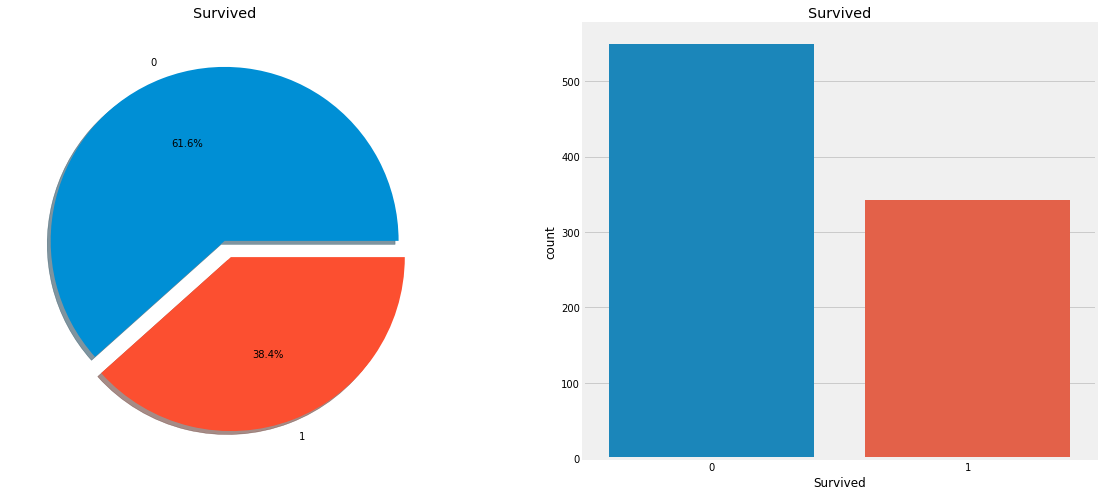

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')    # ylabel 삭제.
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

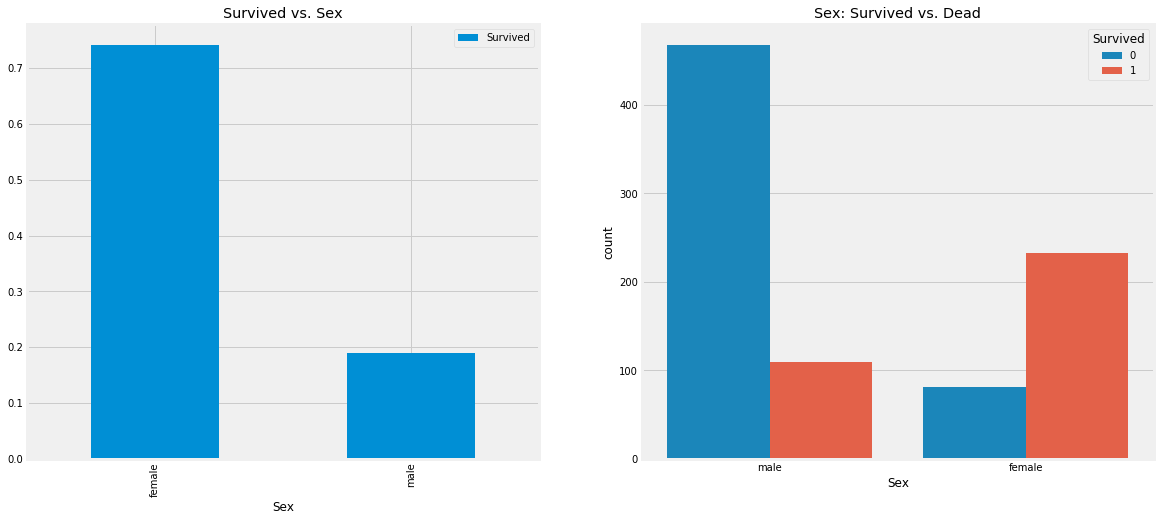

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


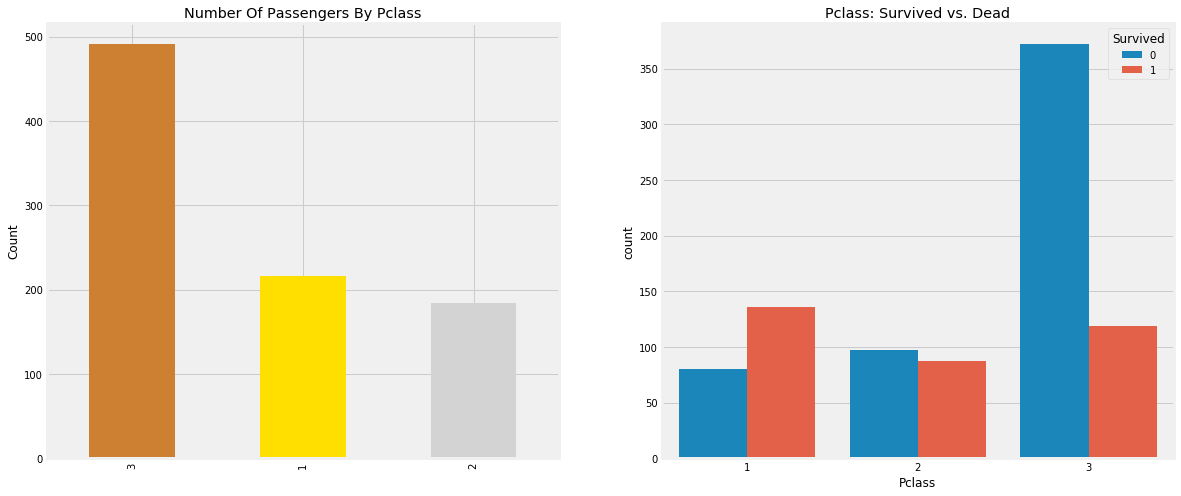

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

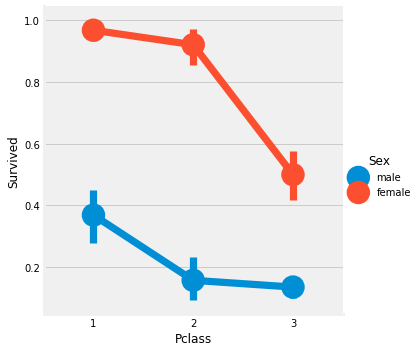

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


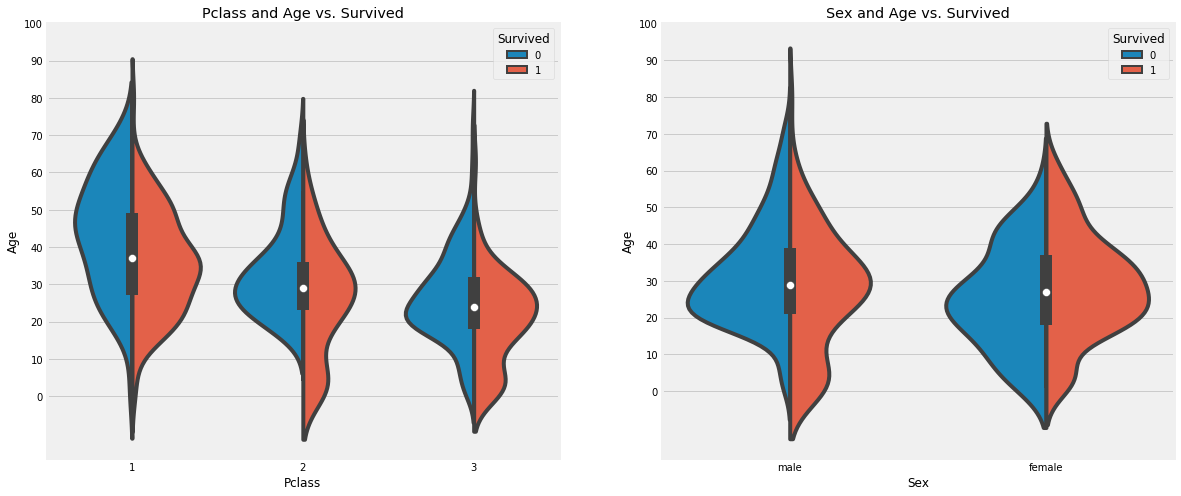

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
data['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [20]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [21]:
data.Age.isnull().any()

False

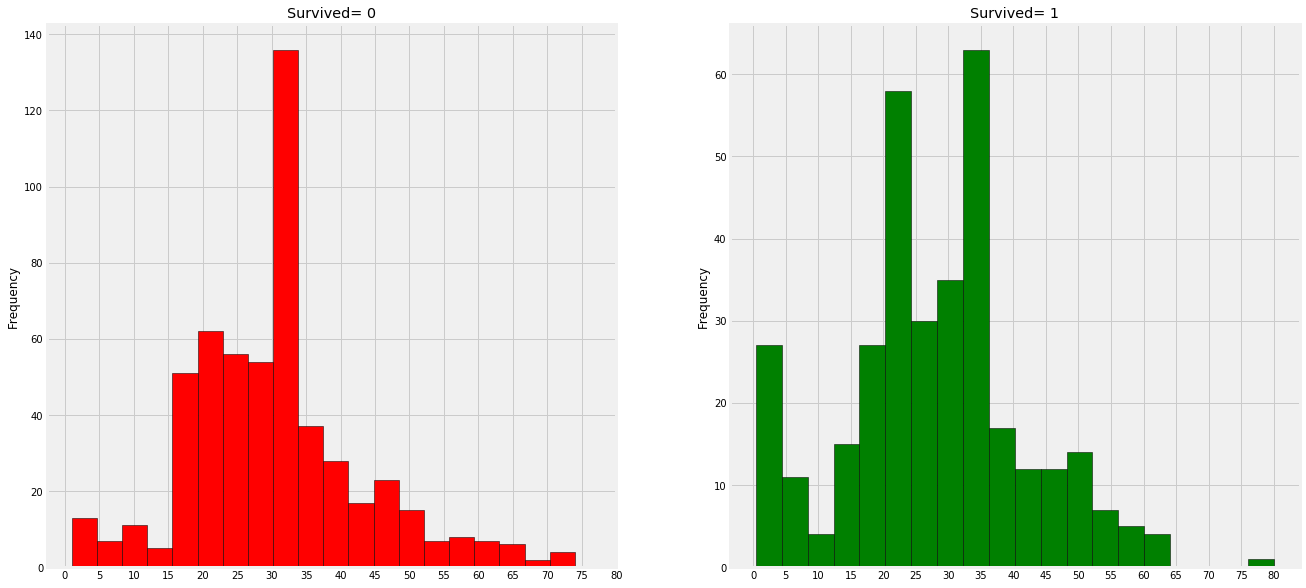

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

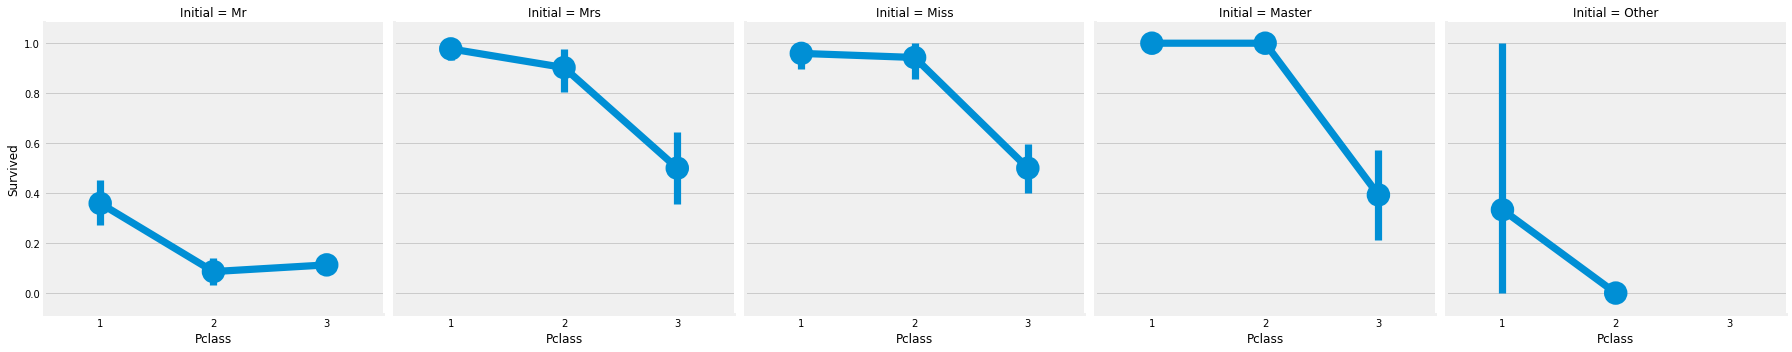

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [24]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

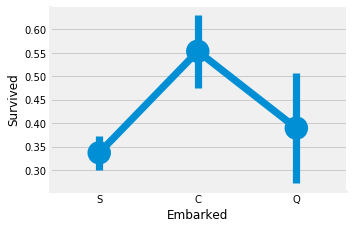

In [25]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)

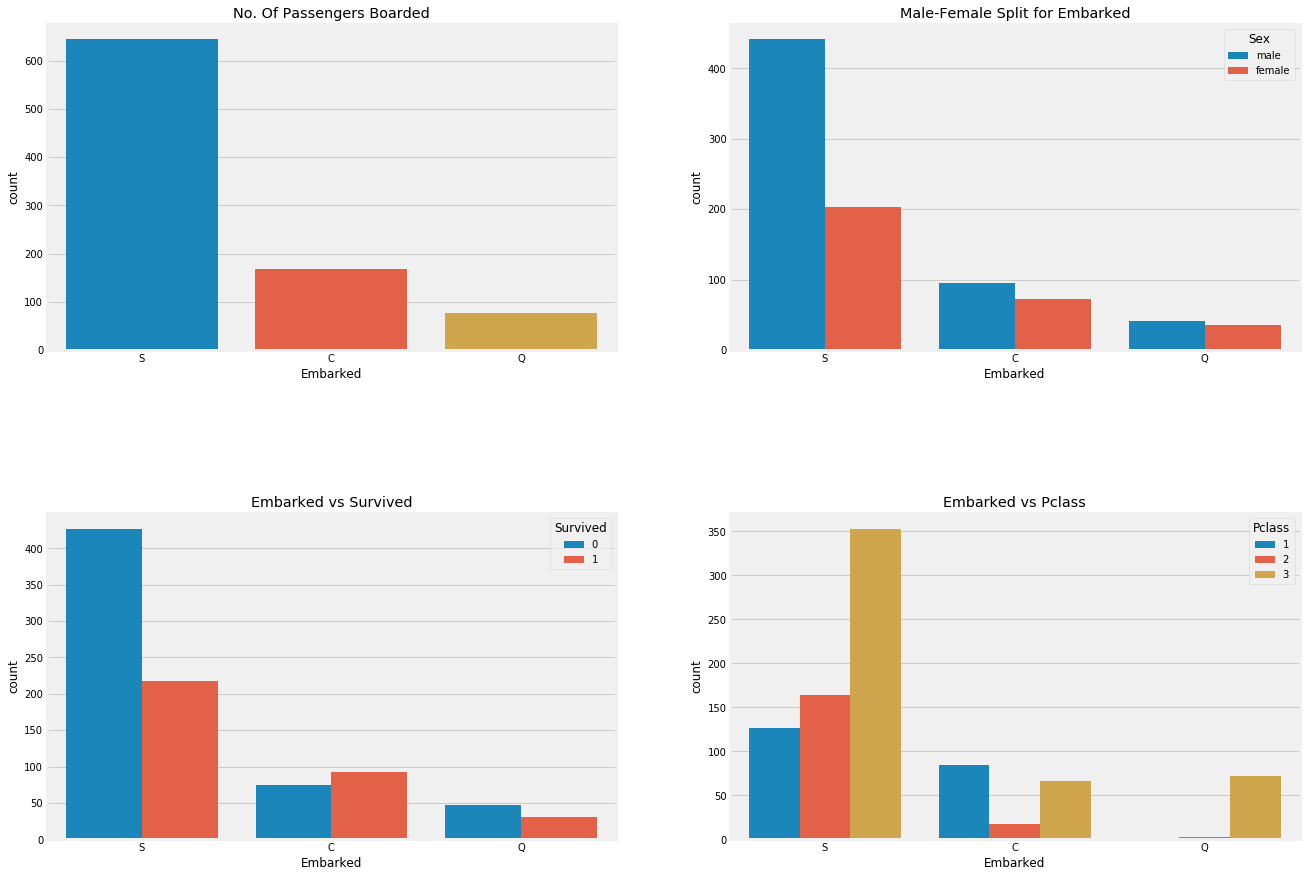

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

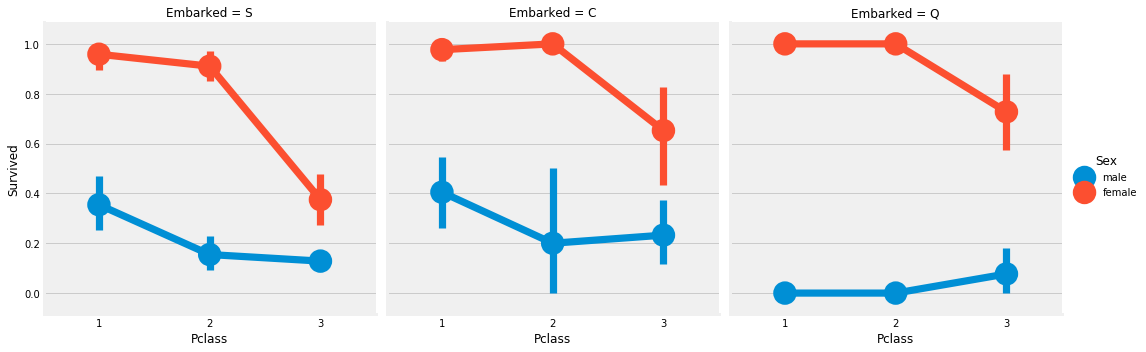

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
data.Embarked.isnull().any()

False

In [30]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


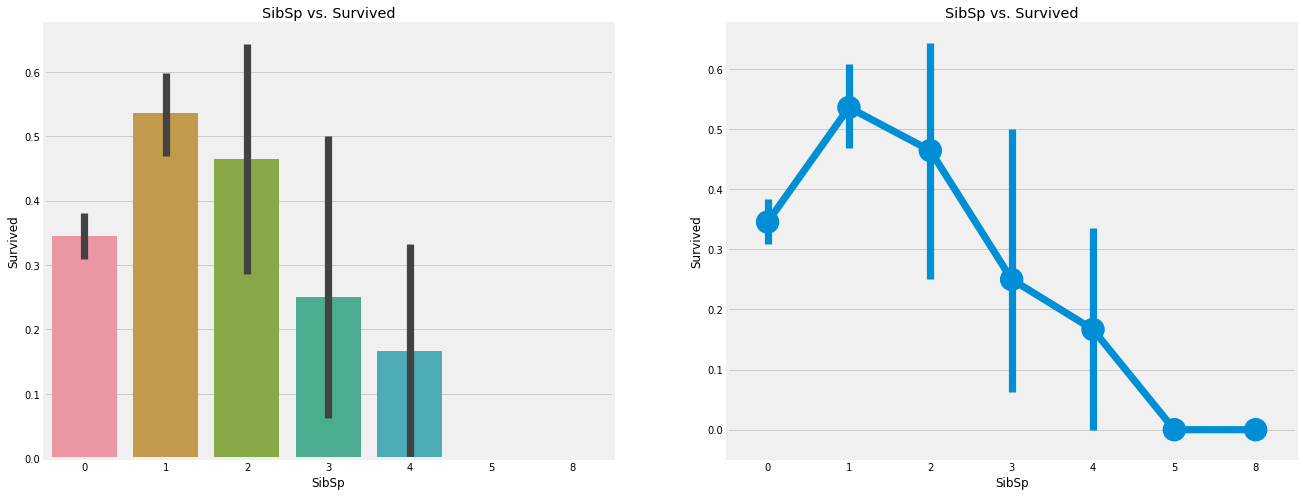

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')
plt.close(2)
plt.show()

In [32]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [33]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


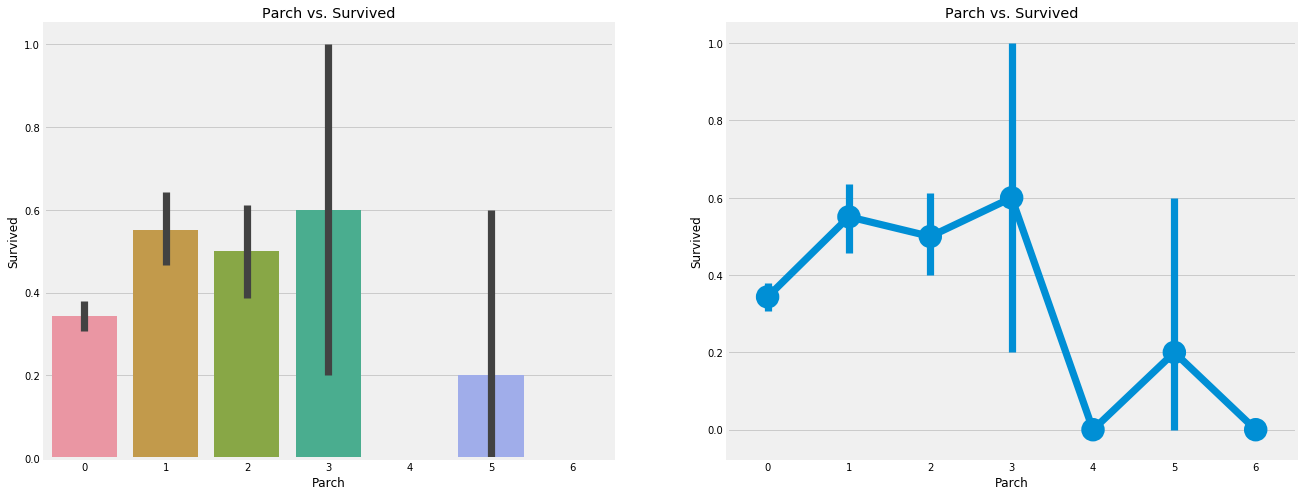

In [34]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')
plt.close(2)
plt.show()

In [35]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


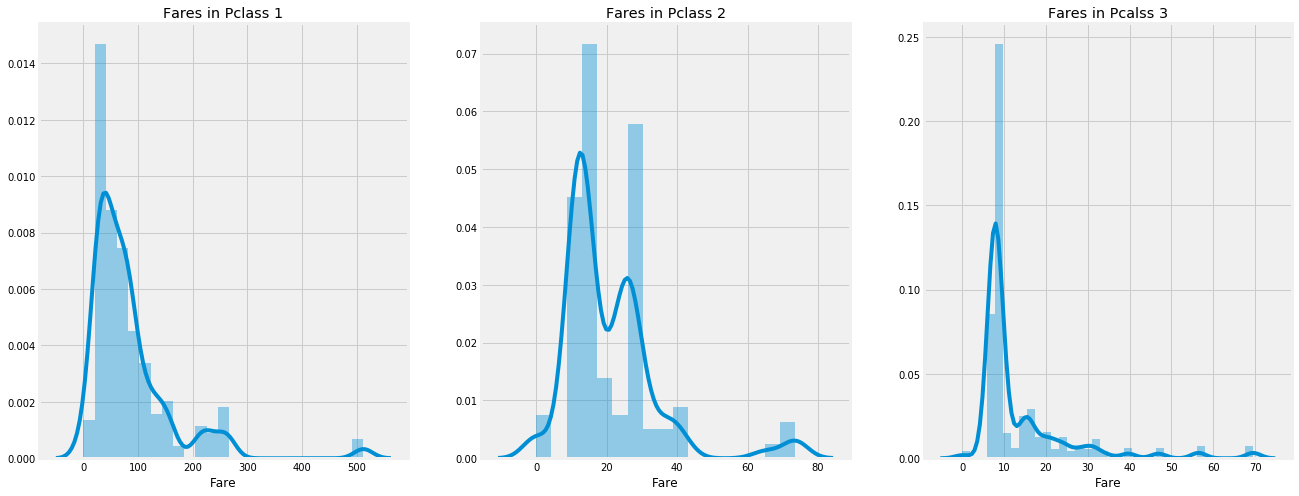

In [36]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pcalss 3')
plt.show()

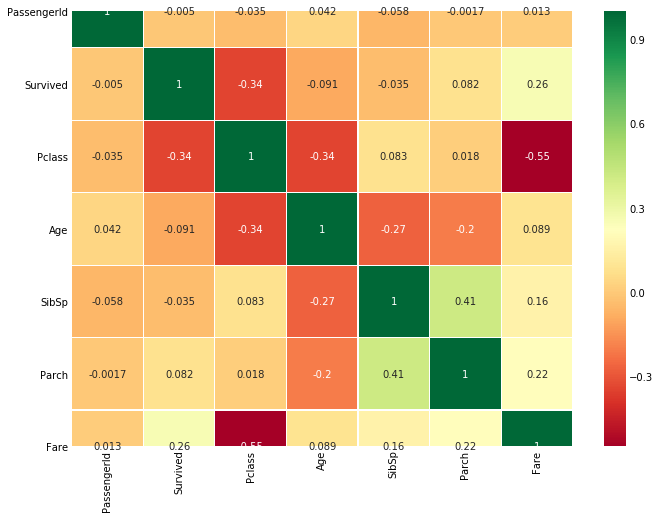

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [38]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


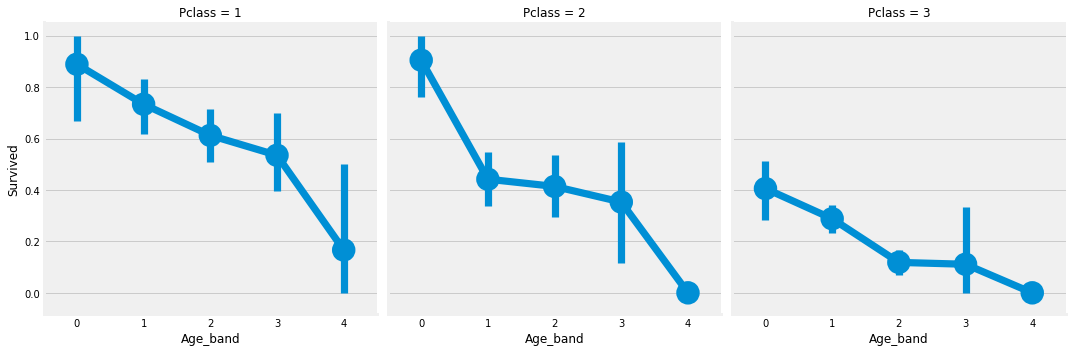

In [40]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

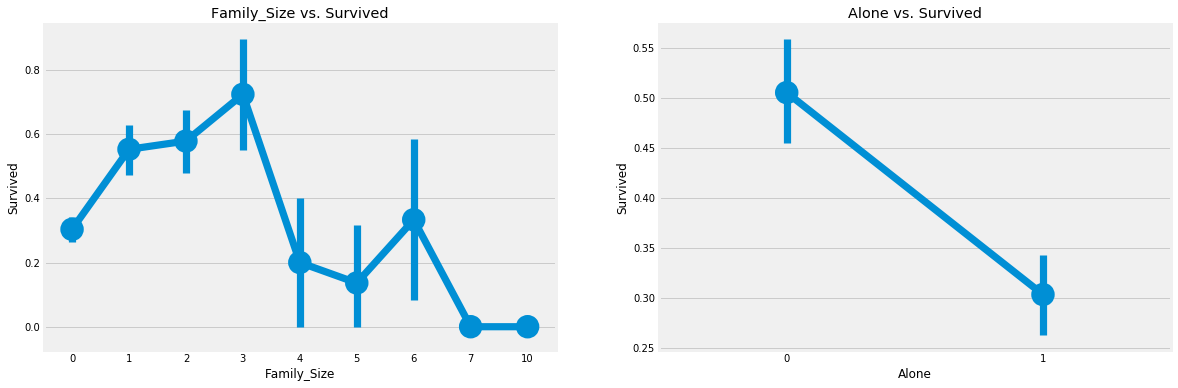

In [41]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')
plt.close(2)
plt.close(3)
plt.show()

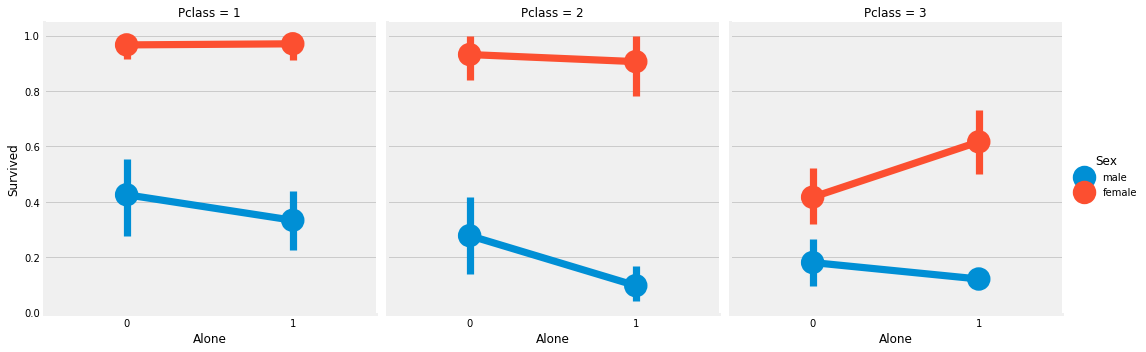

In [42]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [44]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

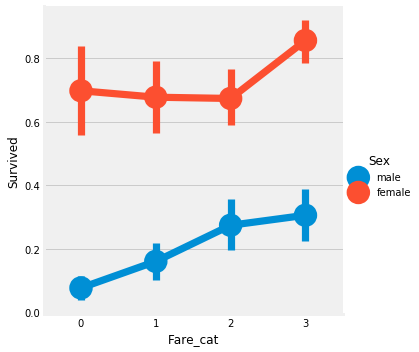

In [45]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [46]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

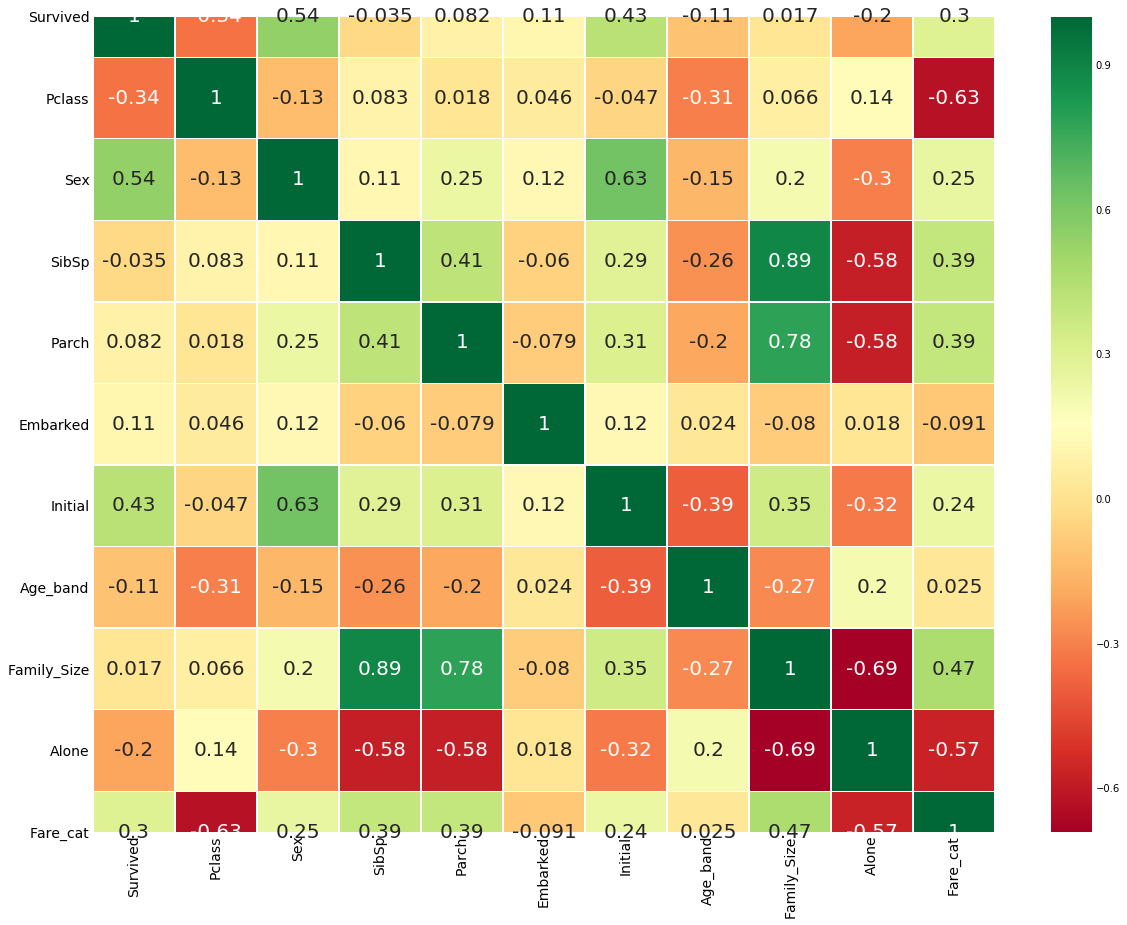

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<br>
<br>

# Part 3: Predictive Modeling
EDA로 분석은 마무리했지만, 여전히 누가 생존할지에 대해 아직 정확히 예측할 수 없다. 이제 분석한 내용을 토대로 알고리즘을 사용할 차례.

이번 Practice에서 사용할 알고리즘은 다음과 같다:
1. Logistic Regression
2. Support Vector Machine (radial and linear)
3. Random Forest 
4. K-Nearest Neighbors
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [48]:
# 이번 Part에서 사용할 패키지들을 import.
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]  # 'Survived' feature를 제외한 나머지
train_Y = train[train.columns[:1]]  # 'Survived' feature column.
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [50]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)  # fit 함수로 model을 훈련시키고
prediction1 = model.predict(test_X)  # 훈련한 모델을 test_X를 바탕으로 예측하고
# 예측한 값을 실제와 비교해 점수 매김.
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))  

Accuracy for rbf SVM is  0.835820895522388


<br>

## Linear Support Vector Machine(linear-SVM)

In [51]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


<br>

## Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


<br>

## Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


<br>

## K-Nearest Neighbors(KNN)

In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


KNN은 이웃의 수에 따라 정확도가 달라진다. default값은 5인데, 이웃의 수가 달라질수록 정확도가 어떻게 변하는지 알아보자.

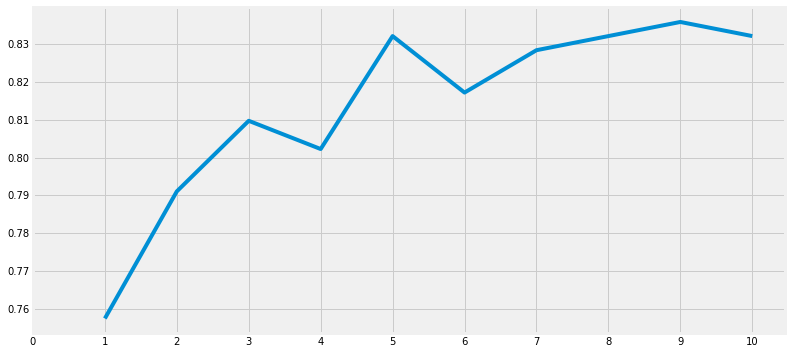

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [55]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values,'with the max value as ', a.values.max())

<br>

## Gaussian Naive Bayes

In [56]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


<br>

## Random Forests

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8134328358208955


<br>

정확도는 분명 중요한 수치이지만, 모든 것을 나타내지는 않는다. 우리가 설정한 test set에 일치한다고 해서 새로 생긴 actual value에 그 정확성이 동일하지 않을수도 있다. 

train set과 test set이 변하면서 그에 맞춰 accuracy도 변경된다. 그것을 **model variance**라고 한다.

Overfit을 극복하고 좀 더 일반적인 모델을 만들기 위해 **cross validation**을 사용한다.
<br>


# Cross Validation

보통의 경우 데이터는 매우 불균형하다. 이러한 불확실성을 줄이기 위해 다수의 accuracy들을 평균내어 측정한다. 

K-Fold Cross Validation은 데이터셋을 K개로 나누고 한 개를 제외한 나머지를 train set으로 설정한다. 순서대로 그 다음 데이터셋이 test set이 되는 식. 결과들을 평균내면 accuracy의 평균값을 얻을수 있다.

cross validation으로 모델의 overfit, underfit을 해결할 수 있다.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22)

xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression',
               'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), 
          RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.808115,0.028348
Naive Bayes,0.801386,0.028999
Random Forest,0.812622,0.039906


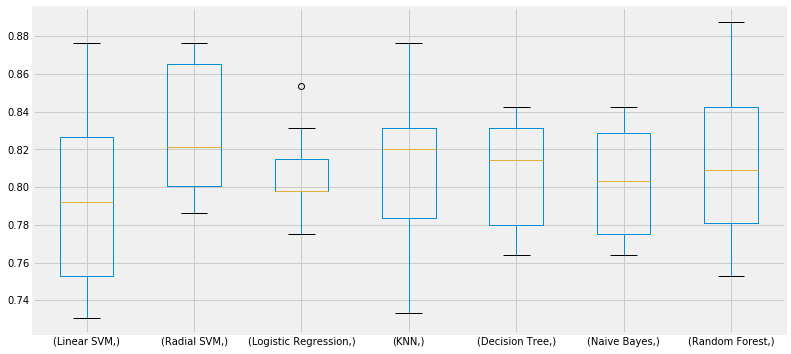

In [59]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

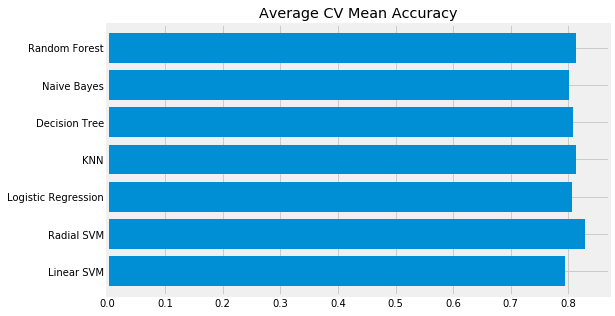

In [77]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

분류의 정확도는 종종 데이터의 불균형성 때문에 부정확할수도 있다. Confusion matrix를 사용하면, 어디서 모델이 잘못됐는지, 어떤 class를 잘못 예측했는지 알 수 있게된다.
<br>

## Confusion Matrix
분류기에서 만들어진 정확한, 또는 부정확한 정보의 개수를 알려준다.

In [78]:
## f, ax = plt.subplots(3, 3, figsize=(12, 10))
# Raidal SVM
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

# Linear SVM
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

# KNN
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

# Random Forest
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

# Logistic Regression
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

# Decision Tree
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

# Naive Bayes
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

<Figure size 432x288 with 0 Axes>

**Interpreting Confusion Matrix**

Confusion Matrix의 왼쪽 대각선은 옳게 분류한 것들, 오른쪽 대각선은 틀리게 분류한 것들의 수.

rbf-SVM로 예를 들자면, **491**명이 죽는다고, **247**명이 생존한다고 총 **738**명을 정확히 예측했다. **738/891=82.8%**의 정확도를 가진다.

반대로 **95**명의 생존자를 사망자로, **58**명의 사망자를 생존자로 잘못 예측했다.

<br>

**Hyper-Parameters Tuning**

머신러닝은 검은 상자와 비슷하다. 내용은 알 수 없지만 분명히 결과는 출력한다. 검은 상자는 default parameter가 존재하는데, 이것을 튜닝하여 성능을 높일수 있다. 이런 과정을 **Hyper-Parameter Tuning**이라고 부른다.

예제로 성능이 가장 좋았던 두 모델, 'SVM'과 'RandomForest'를 조절해 보자.

<br>

**SVM**

In [81]:
from sklearn.model_selection import GridSearchCV

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.2s finished


<br>

**Random Forest**

In [83]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   22.8s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Radial SVM의 최고 성능은 **82.82%**이고, **C=0.5, gamma=0.1**이다.

RandomForest의 최고 성능은  **81.8%**이고, **n_estimator=900**이다.

<br>

## Ensembling
앙상블은 모델의 성능을 높이는 최고의 방법 중 하나. 하나의 강력한 모델을 위한 간단한 여러 모델의 조합이다.

앙상블의 종류는 세가지: 
1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier

가장 간단한 방법이다. 여러 머신러닝 모델의 예측값을 평균한다.

In [86]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))
                                               ],
                                    voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validation score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validation score is 0.8237660310974917


<br>

## Bagging

Bagging은 데이터셋의 작은 부분을 복원 추출하여 여러 번 추출한 다음 추출한 작은 데이터셋으로 모델의 성능을 평균낸다.

**Bagged KNN**

In [87]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


**Bagged Decision Tree**

In [90]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


<br>

## Boosting

Boosting은 연속적으로 모델을 훈련시키는 방법이다. 방법은 이렇다.

먼저 전체 데이터셋으로 모델을 훈련시킨다. 예측 결과에는 맞은 것 몇개, 틀린 것 몇개가 존재할 것이다. 그럼 다음 훈련에서는 틀린 예측에 가중치를 둔다. 이 과정을 반복한다.

**AdaBoost(Adaptive Boosting)**

이번 예제에서는 Decision Tree 모델을 사용하지만 임의로 수정할 수 있다.

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


**Stochastic Gradient Boosting**

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


**XgBoost**

이거 Jupyter notebook에서 실행 안된다.

In [93]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

ModuleNotFoundError: No module named 'xgboost'

**Hyper-Parameter Tuning for AdaBoost**

In [ ]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=False)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

AdaBoost로 가질수 있는 최대의 정확도는 
<br>

### Confusion Matrix for the Best Model

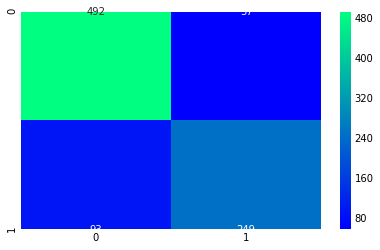

In [95]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

<br>

# Feature Importance

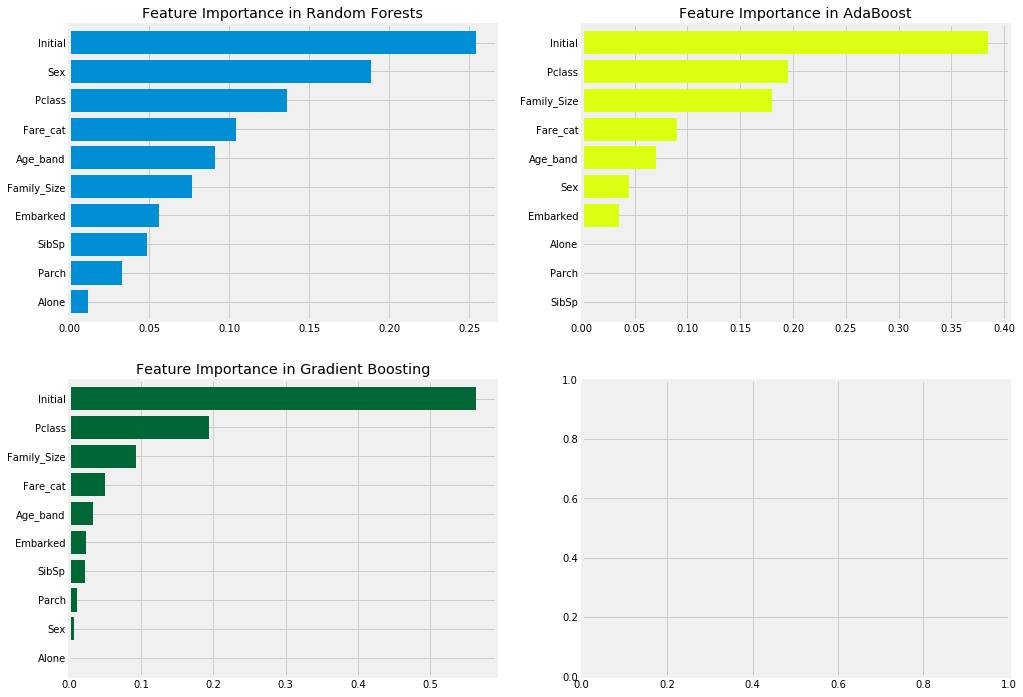

In [106]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

# Random Forests
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

# AdaBoost
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

# Gradient Boosting
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

# XgBoost. Jupyter Notebook에서는 안됨.
'''
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], cmap='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
'''

plt.show()

**Observations**

1. 공통적으로 중요하다고 나오는 feature는 Initial, Fare_cat, Pclass, Family_Size.


2. Sex는 RandomForest에서만 중요하고, 나머지에서는 영향력이 미미하다. 저번에 Pclass와 연동해 좋은 예측도를 나타냈었는데 꽤나 충격적인 결과. 

하지만 대부분의 모델에서 Initial이 중요 feature라 나타내는 것을 보아 Sex도 무시할 정도는 아닌듯 (Sex와 Initial은 positive correlation을 보임).